In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [5]:
data = pd.read_csv("creditcard.csv") 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data  = data.sample(frac= 0.1 , random_state = 48)

In [7]:
print(data.shape) 
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

In [16]:
fraud = data[data['Class']== 1]
valid = data[data['Class']== 0]
outlire_fraction = len(fraud) / float(len(valid))
outlire_fraction

0.0019700967458223394

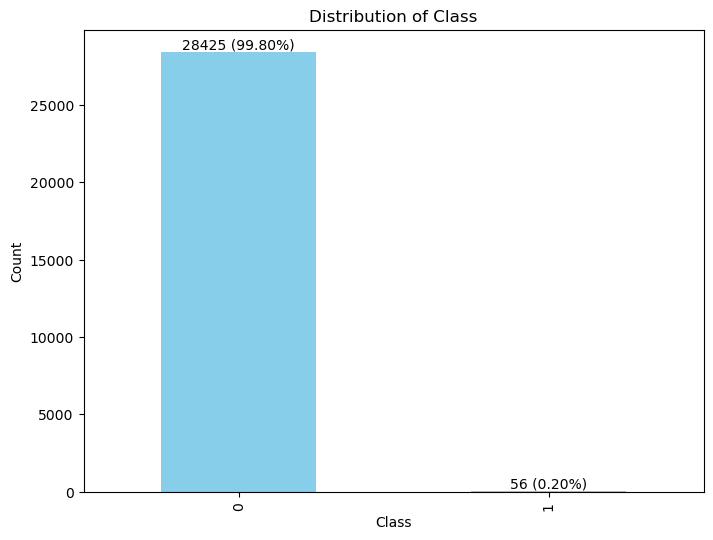

In [14]:
class_counts = data['Class'].value_counts()
class_percentages = class_counts / len(data) * 100
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.5, f'{count} ({class_percentages[i]:.2f}%)', ha='center', va='bottom')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.show()

In [28]:
print(fraud.Amount.describe())
valid.Amount.describe()

count     56.000000
mean      91.449464
std      164.524448
min        0.000000
25%        1.000000
50%       18.520000
75%      109.307500
max      996.270000
Name: Amount, dtype: float64


count    28425.000000
mean        88.572094
std        234.229021
min          0.000000
25%          5.980000
50%         21.990000
75%         77.000000
max       6000.000000
Name: Amount, dtype: float64

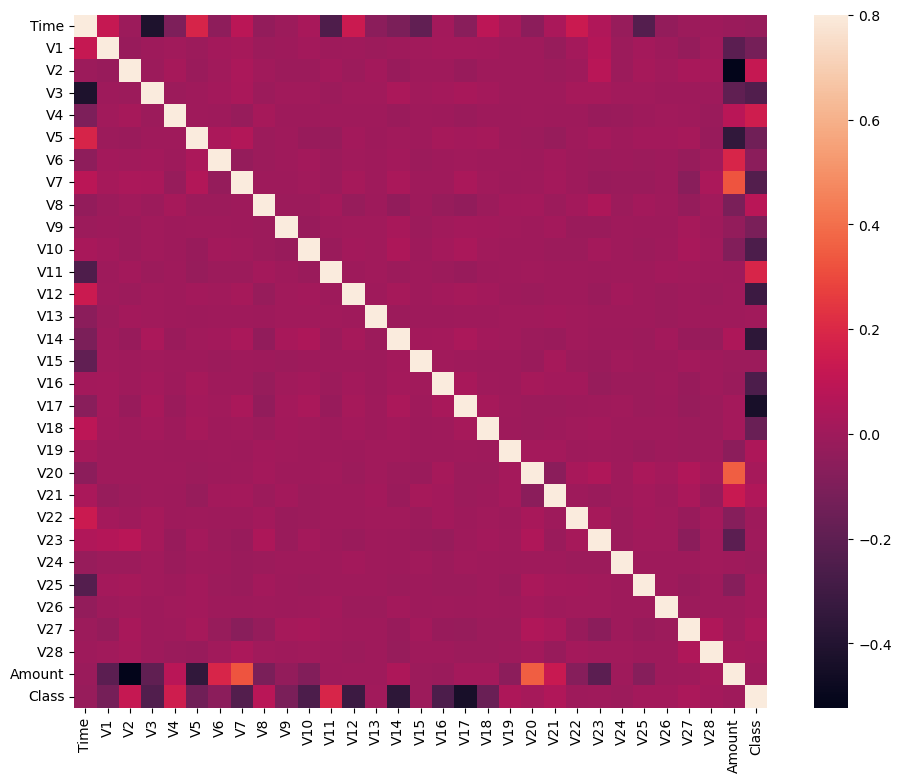

In [31]:
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [34]:
correlation_mat = data.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)


Time   Time      1.000000
       V1        0.119270
       V2       -0.010991
       V3       -0.418631
       V4       -0.101343
                   ...   
Class  V26       0.012305
       V27       0.036284
       V28       0.018852
       Amount    0.000544
       Class     1.000000
Length: 961, dtype: float64


In [35]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Amount  V2       -0.522866
V2      Amount   -0.522866
V17     Class    -0.435498
Class   V17      -0.435498
V3      Time     -0.418631
                    ...   
V25     V25       1.000000
V26     V26       1.000000
V27     V27       1.000000
V14     V14       1.000000
Class   Class     1.000000
Length: 961, dtype: float64


In [45]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.2]
print(strong_pairs)

Amount  V2       -0.522866
V2      Amount   -0.522866
V17     Class    -0.435498
Class   V17      -0.435498
V3      Time     -0.418631
                    ...   
V25     V25       1.000000
V26     V26       1.000000
V27     V27       1.000000
V14     V14       1.000000
Class   Class     1.000000
Length: 63, dtype: float64


In [46]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

Amount  V2       -0.522866
V2      Amount   -0.522866
V17     Class    -0.435498
Class   V17      -0.435498
V3      Time     -0.418631
                    ...   
V23     V13      -0.000124
V5      V24      -0.000074
V24     V5       -0.000074
Amount  V12      -0.000035
V12     Amount   -0.000035
Length: 448, dtype: float64


In [67]:
data = data.sample(frac=0.1, random_state=48)
# Calculate the correlation matrix
corrmat = data.corr()
# features with correlation greater than 0 with 'Amount'
high_correlation_features = corrmat[corrmat['Amount'] > 0]['Amount']
print("Features with correlation > 0 with 'Amount':")
print(high_correlation_features.index.tolist())

Features with correlation > 0 with 'Amount':
['V4', 'V6', 'V7', 'V11', 'V12', 'V13', 'V14', 'V15', 'V17', 'V20', 'V21', 'V24', 'V27', 'V28', 'Amount']


In [54]:
selected_features = high_correlation_features.index.tolist()
X = data[selected_features[:-1]]  # Exclude 'Class'
Y = data["Class"]
print("Number of elements in Y:", len(Y))
print("Number of features in X:", X.shape[1])  
# Convert X and Y to numpy arrays if needed
xData = X.values
yData = Y.values

Number of elements in Y: 28481
Number of features in X: 12


In [56]:
xTrain, xTest, yTrain, yTest = train_test_split( xData, yData, test_size = 0.2, random_state = 42)

In [58]:
rfc = RandomForestClassifier()

In [59]:
rfc.fit(xTrain , yTrain)

RandomForestClassifier()

In [64]:
yPred = rfc.predict(xTest)

In [65]:
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9994734070563455
The precision is 1.0
The recall is 0.8
The F1-Score is 0.8888888888888888
The Matthews correlation coefficient is0.8941911632372629


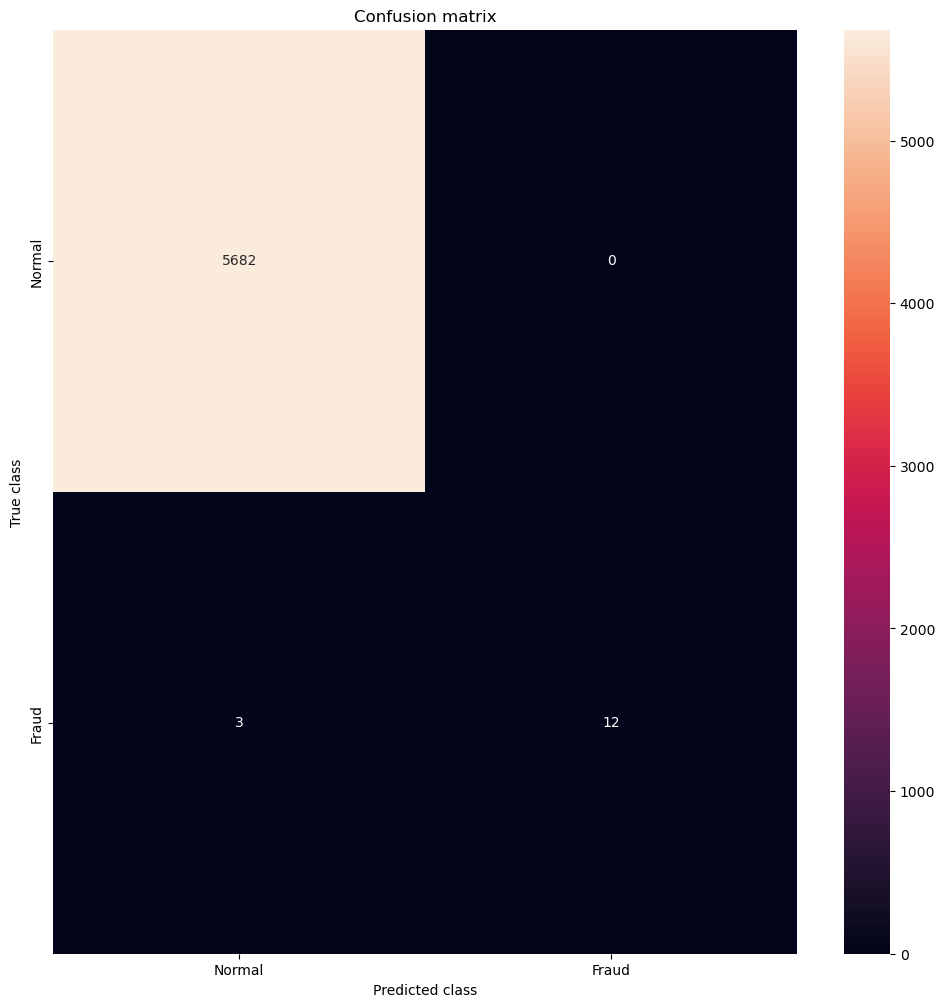

In [66]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [73]:
# Randomly generate values for the selected features
random_input = np.array([[-1.5, 0.8, -0.6, 0.4, -0.7, 0.3, 0.5, -0.2, 0.6, -0.9, 0.7, 150.0]])
prediction = rfc.predict(random_input)
if prediction == 1:
    print("The model predicts the input as 'Fraud'.")
else:
    print("The model predicts the input as 'Valid'.")

The model predicts the input as 'Valid'.
